# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** \
**Email:**

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [9]:
#Todo
#Problem 1 

# Part 1: Generalizae New Speakers

''' My strategy is to split by speakers instead of random recordings:

Training: 70 speakers
Validation: 15 speakers
Test: 15 speakers

This works because it prevents any overlap of speakers across the splits. If the same person appears in both training and test, 
the model might pick up on their voice instead of learning general features. 
Keeping speakers separate forces it to learn patterns that transfer to completely new voices.'''

#Part 2: Adding Kilian’s 10,000 Recordings

'''For Kilian’s data, I create its own split:

Kilian training: 7,000
Kilian validation: 1,500
Kilian test: 1,500

Then I combine both datasets:

* Training: 70 general speakers + 7,000 Kilian samples
* Validation: 15 general speakers + 1,500 Kilian samples
* Test: 15 general speakers + 1,500 Kilian samples

This setup helps the model stay good at generalizing while also adapting well to Kilian. '''

'For Kilian’s data, I create its own split:\n\nKilian training: 7,000\nKilian validation: 1,500\nKilian test: 1,500\n\nThen I combine both datasets:\n\n* Training: 70 general speakers + 7,000 Kilian samples\n* Validation: 15 general speakers + 1,500 Kilian samples\n* Test: 15 general speakers + 1,500 Kilian samples\n\nThis setup helps the model stay good at generalizing while also adapting well to Kilian. '

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


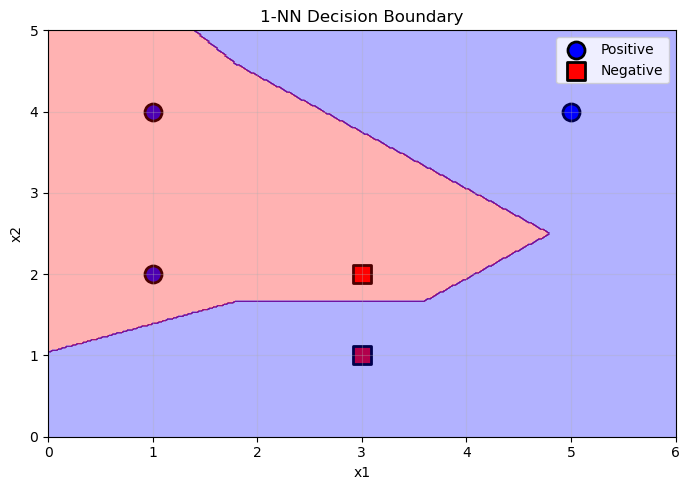

The decision boundary shows regions where each class is closest.

Part 2: Feature Scaling

BEFORE scaling:
  Distance to [100   2]: 400.00
  Distance to [100   4]: 400.01
  Distance to [500   4]: 3.00
  Distance to [300   1]: 200.00
  Distance to [300   2]: 200.00
Nearest: [500   4] -> POSITIVE

AFTER scaling to [0,1]:
  Distance to [0.         0.33333333]: 1.05
  Distance to [0. 1.]: 1.41
  Distance to [1. 1.]: 1.00
  Distance to [0.5 0. ]: 0.50
  Distance to [0.5        0.33333333]: 0.60
Nearest: [0.5 0. ] -> NEGATIVE

Result: Classification changes from POSITIVE to NEGATIVE after scaling!
Reason: Feature 1 (100-500) has much larger scale than Feature 2 (1-4),
so it dominates distance calculations before scaling.


Part 3: Handling Missing Values

Strategy: Compute distance using only non-missing features

Example:
  Training point: [3, 5, 2]
  Test point:     [4, ?, 1]  (feature 2 is missing)
  Distance = sqrt((4-3)² + (1-2)²) = sqrt(1 + 1) = 1.41
  (We skip the missing feature)

Pa

In [22]:
#Todo

# Problem 2: K-Nearest Neighbors Solutions

import numpy as np
import matplotlib.pyplot as plt

positive = np.array([[1, 2], [1, 4], [5, 4]])
negative = np.array([[3, 1], [3, 2]])

plt.figure(figsize=(7, 5))
plt.scatter(positive[:, 0], positive[:, 1], c='blue', s=150, 
            marker='o', label='Positive', edgecolors='black', linewidth=2)
plt.scatter(negative[:, 0], negative[:, 1], c='red', s=150, 
            marker='s', label='Negative', edgecolors='black', linewidth=2)

x = np.linspace(0, 6, 300)
y = np.linspace(0, 5, 300)
xx, yy = np.meshgrid(x, y)

all_pts = np.vstack([positive, negative])
labels = np.array([1, 1, 1, -1, -1])

Z = []
for i in range(len(x)):
    for j in range(len(y)):
        point = np.array([x[i], y[j]])
        distances = np.sqrt(((all_pts - point)**2).sum(axis=1))
        Z.append(labels[distances.argmin()])
Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, colors=['red', 'blue'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('1-NN Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("The decision boundary shows regions where each class is closest.\n")


# Part 2: Feature Scaling
print("Part 2: Feature Scaling\n")
positive = np.array([[100, 2], [100, 4], [500, 4]])
negative = np.array([[300, 1], [300, 2]])
test = np.array([500, 1])

all_pts = np.vstack([positive, negative])
labels = np.array([1, 1, 1, -1, -1])

print("BEFORE scaling:")
distances = np.sqrt(((all_pts - test)**2).sum(axis=1))
for i, d in enumerate(distances):
    print(f"  Distance to {all_pts[i]}: {d:.2f}")
nearest = distances.argmin()
print(f"Nearest: {all_pts[nearest]} -> {'POSITIVE' if labels[nearest]==1 else 'NEGATIVE'}")

# AFTER scaling to [0,1]
all_data = np.vstack([all_pts, test])
min_vals = all_data.min(axis=0)
max_vals = all_data.max(axis=0)

scaled_pts = (all_pts - min_vals) / (max_vals - min_vals)
scaled_test = (test - min_vals) / (max_vals - min_vals)

print("\nAFTER scaling to [0,1]:")
distances_scaled = np.sqrt(((scaled_pts - scaled_test)**2).sum(axis=1))
for i, d in enumerate(distances_scaled):
    print(f"  Distance to {scaled_pts[i]}: {d:.2f}")

nearest_scaled = distances_scaled.argmin()
print(f"Nearest: {scaled_pts[nearest_scaled]} -> {'POSITIVE' if labels[nearest_scaled]==1 else 'NEGATIVE'}")

print("\nResult: Classification changes from POSITIVE to NEGATIVE after scaling!")
print("Reason: Feature 1 (100-500) has much larger scale than Feature 2 (1-4),")
print("so it dominates distance calculations before scaling.\n")


# Part 3: Handling Missing Values
print()
print("Part 3: Handling Missing Values\n")

print("Strategy: Compute distance using only non-missing features\n")
print("Example:")
print("  Training point: [3, 5, 2]")
print("  Test point:     [4, ?, 1]  (feature 2 is missing)")
print("  Distance = sqrt((4-3)² + (1-2)²) = sqrt(1 + 1) = 1.41")
print("  (We skip the missing feature)\n")

# Part 4: High-Dimensional Data
print("Part 4: Why K-NN Works for Images\n")

print("K-NN works well on images despite thousands of pixels because:")
print("  1. Similar images have similar pixel patterns")
print("  2. Images lie on a lower-dimensional manifold in high-D space")
print("  3. Euclidean distance still captures visual similarity")
print("  4. Even with 1000s of features, nearby points are truly similar\n")

print("Example: Two photos of cats will have similar pixel values")
print("even though each image has 784 pixels (28x28) or more.")

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [16]:
#Todo

#1. YES. By evaluating h(x) on both D_TR and D_TE, you can compute:

''' Training error = (# of misclassified points in D_TR) / |D_TR|
Test error = (# of misclassified points in D_TE) / |D_TE|

Then compare them directly. If test error > training error, the model doesn't generalize well.
#2. The Perceptron algorithm only stops when it correctly classifies ALL training points. 
At convergence, every point in D_TR satisfies sign(w·x) = y, meaning the training error is guaranteed to be 0%. 
Since we know it's always 0%, there's no need to compute it during training. '''

" Training error = (# of misclassified points in D_TR) / |D_TR|\nTest error = (# of misclassified points in D_TE) / |D_TE|\n\nThen compare them directly. If test error > training error, the model doesn't generalize well.\n#2. The Perceptron algorithm only stops when it correctly classifies ALL training points. \nAt convergence, every point in D_TR satisfies sign(w·x) = y, meaning the training error is guaranteed to be 0%. \nSince we know it's always 0%, there's no need to compute it during training. "

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [21]:
# Todo

# Problem 3 Part 2: Perceptron by Hand

import numpy as np

X = np.array([[10, -2], [12, 2]])
y = np.array([1, -1])  # Positive, Negative

# Initialize
w = np.array([0, 0])
learning_rate = 1
iteration = 0

print(f"Initial: w_0 = {w}")
print()

# Perceptron algorithm
converged = False
update_count = 0

while not converged:
    iteration += 1
    print(f"Iteration {iteration}:")
    
    misclassified = False
    
    for i in range(len(X)):
        x_i = X[i]
        y_i = y[i]
        
        # Compute prediction
        prediction = np.sign(np.dot(w, x_i))
        if prediction == 0:
            prediction = 1
        
        print(f"  Point {i+1}: x={x_i}, y={y_i}, w·x={np.dot(w, x_i):.1f}, sign(w·x)={prediction:.0f}")
        
        # Check if misclassified
        if prediction != y_i:
            print(f"    MISCLASSIFIED! Updating...")
            w = w + learning_rate * y_i * x_i
            update_count += 1
            print(f"    w = w + {learning_rate} * {y_i} * {x_i} = {w}")
            misclassified = True
    
    if not misclassified:
        print("  All points correctly classified!")
        converged = True
    
    print()

print(f"Convergence achieved!")
print(f"Total updates: {update_count}")
print(f"Final weight vector: w = {w}")
print()

# Verify final solution
print("Verification:")
for i in range(len(X)):
    prediction = np.sign(np.dot(w, X[i]))
    if prediction == 0:
        prediction = 1
    correct = "✓" if prediction == y[i] else "✗"
    print(f"  x={X[i]}, y={y[i]:2d}, sign(w·x)={prediction:2.0f} {correct}")

Initial: w_0 = [0 0]

Iteration 1:
  Point 1: x=[10 -2], y=1, w·x=0.0, sign(w·x)=1
  Point 2: x=[12  2], y=-1, w·x=0.0, sign(w·x)=1
    MISCLASSIFIED! Updating...
    w = w + 1 * -1 * [12  2] = [-12  -2]

Iteration 2:
  Point 1: x=[10 -2], y=1, w·x=-116.0, sign(w·x)=-1
    MISCLASSIFIED! Updating...
    w = w + 1 * 1 * [10 -2] = [-2 -4]
  Point 2: x=[12  2], y=-1, w·x=-32.0, sign(w·x)=-1

Iteration 3:
  Point 1: x=[10 -2], y=1, w·x=-12.0, sign(w·x)=-1
    MISCLASSIFIED! Updating...
    w = w + 1 * 1 * [10 -2] = [ 8 -6]
  Point 2: x=[12  2], y=-1, w·x=84.0, sign(w·x)=1
    MISCLASSIFIED! Updating...
    w = w + 1 * -1 * [12  2] = [-4 -8]

Iteration 4:
  Point 1: x=[10 -2], y=1, w·x=-24.0, sign(w·x)=-1
    MISCLASSIFIED! Updating...
    w = w + 1 * 1 * [10 -2] = [  6 -10]
  Point 2: x=[12  2], y=-1, w·x=52.0, sign(w·x)=1
    MISCLASSIFIED! Updating...
    w = w + 1 * -1 * [12  2] = [ -6 -12]

Iteration 5:
  Point 1: x=[10 -2], y=1, w·x=-36.0, sign(w·x)=-1
    MISCLASSIFIED! Updating...
 

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [20]:
#Todo

#Problem 4: Reconstructing the Weight Vector

import numpy as np
# Update log: (x, y, count)
updates = [
    (np.array([0, 0, 0, 0, 4]), +1, 2),
    (np.array([0, 0, 6, 5, 0]), +1, 1),
    (np.array([3, 0, 0, 0, 0]), -1, 1),
    (np.array([0, 9, 3, 6, 0]), -1, 1),
    (np.array([0, 1, 0, 2, 5]), -1, 1),
]

# Initial weight
w = np.array([0, 0, 0, 0, 0])
learning_rate = 1

print(f"Initial: w = {w}")
print()

# Apply updates
for i, (x, y, count) in enumerate(updates):
    print(f"Update {i+1}: x = {x}, y = {y:+2d}, count = {count}")
    
    for c in range(count):
        w_old = w.copy()
        w = w + learning_rate * y * x
        print(f"  Iteration {c+1}: w = {w_old} + {learning_rate} * {y:+2d} * {x} = {w}")
    
    print()

print(f"Final weight vector: w = {w}")

Initial: w = [0 0 0 0 0]

Update 1: x = [0 0 0 0 4], y = +1, count = 2
  Iteration 1: w = [0 0 0 0 0] + 1 * +1 * [0 0 0 0 4] = [0 0 0 0 4]
  Iteration 2: w = [0 0 0 0 4] + 1 * +1 * [0 0 0 0 4] = [0 0 0 0 8]

Update 2: x = [0 0 6 5 0], y = +1, count = 1
  Iteration 1: w = [0 0 0 0 8] + 1 * +1 * [0 0 6 5 0] = [0 0 6 5 8]

Update 3: x = [3 0 0 0 0], y = -1, count = 1
  Iteration 1: w = [0 0 6 5 8] + 1 * -1 * [3 0 0 0 0] = [-3  0  6  5  8]

Update 4: x = [0 9 3 6 0], y = -1, count = 1
  Iteration 1: w = [-3  0  6  5  8] + 1 * -1 * [0 9 3 6 0] = [-3 -9  3 -1  8]

Update 5: x = [0 1 0 2 5], y = -1, count = 1
  Iteration 1: w = [-3 -9  3 -1  8] + 1 * -1 * [0 1 0 2 5] = [ -3 -10   3  -3   3]

Final weight vector: w = [ -3 -10   3  -3   3]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Dataset: 6 points
Positive class: [[1, 2], [2, 3], [3, 1]]
Negative class: [[4, 2], [2, 1], [3, 3]]



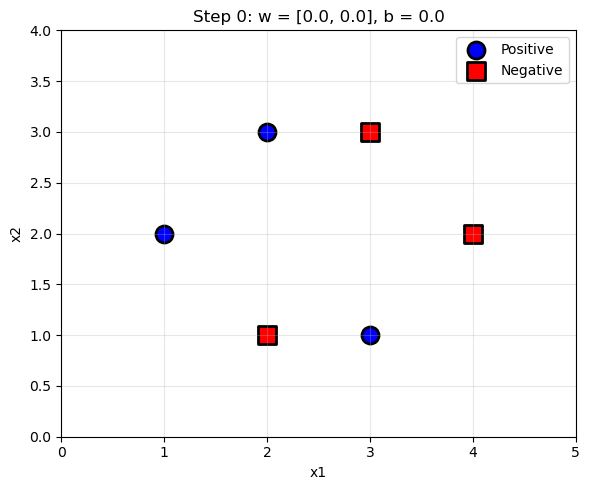

Step 0: Initial weights w = [0.0, 0.0], b = 0.0

Step 1: Misclassified point 3: x=[4 2], y=-1
  Update: w = [-4. -2.], b = -1.0


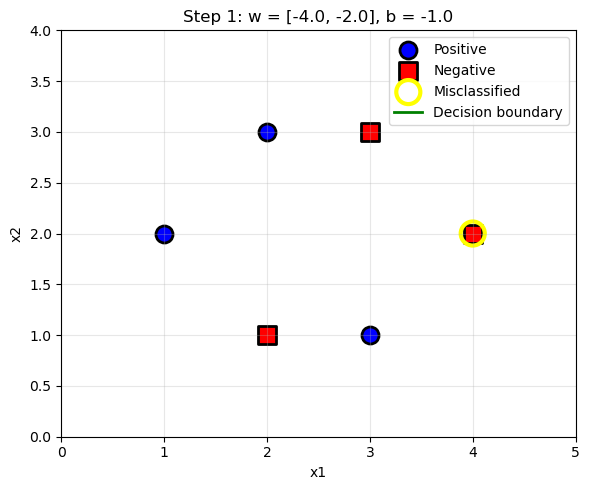

Step 2: Misclassified point 0: x=[1 2], y=1
  Update: w = [-3.  0.], b = 0.0


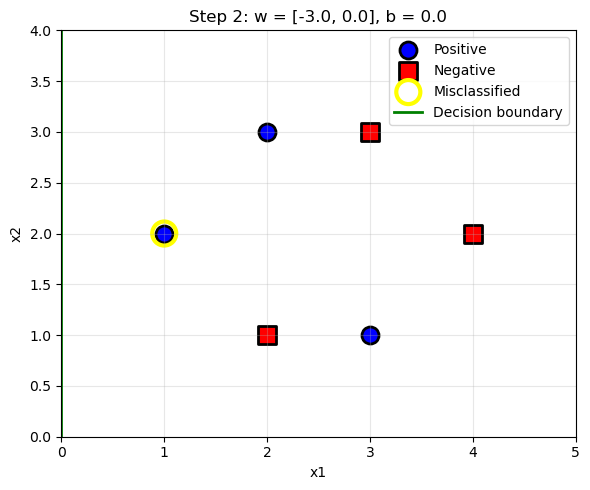

Step 3: Misclassified point 0: x=[1 2], y=1
  Update: w = [-2.  2.], b = 1.0


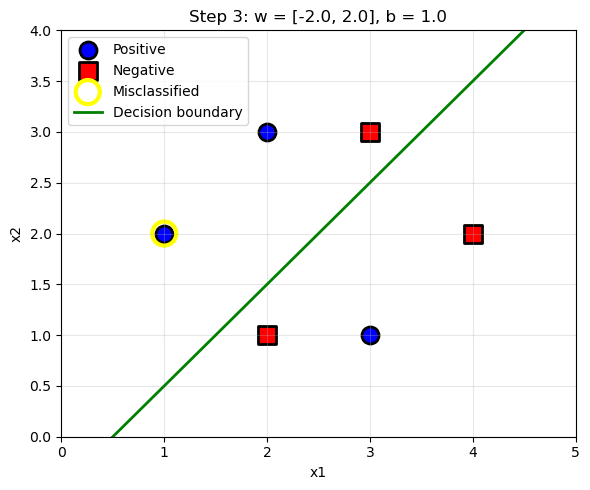

Step 4: Misclassified point 2: x=[3 1], y=1
  Update: w = [1. 3.], b = 2.0


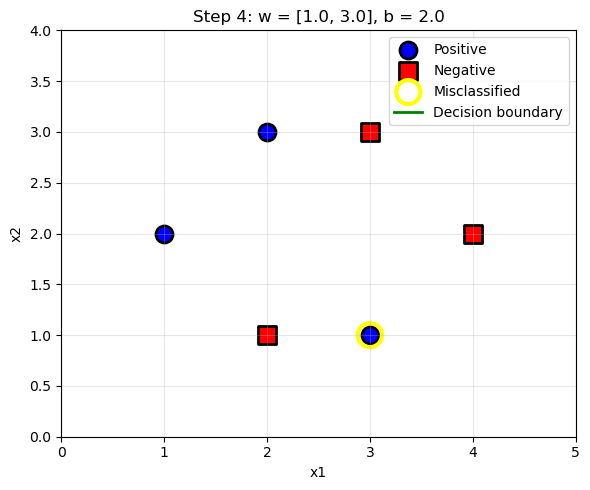

Step 5: Misclassified point 3: x=[4 2], y=-1
  Update: w = [-3.  1.], b = 1.0


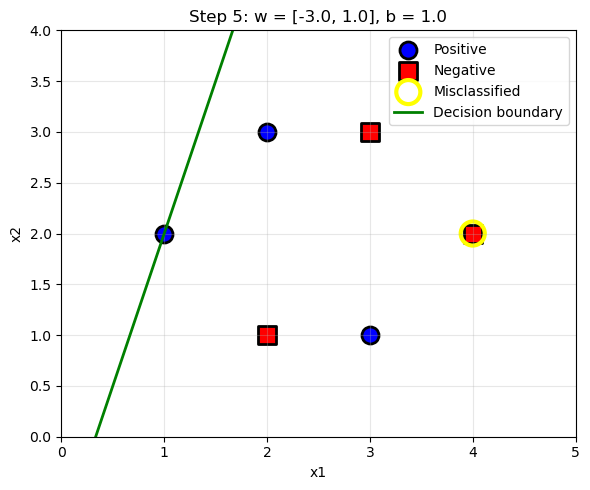

Step 6: Misclassified point 1: x=[2 3], y=1
  Update: w = [-1.  4.], b = 2.0


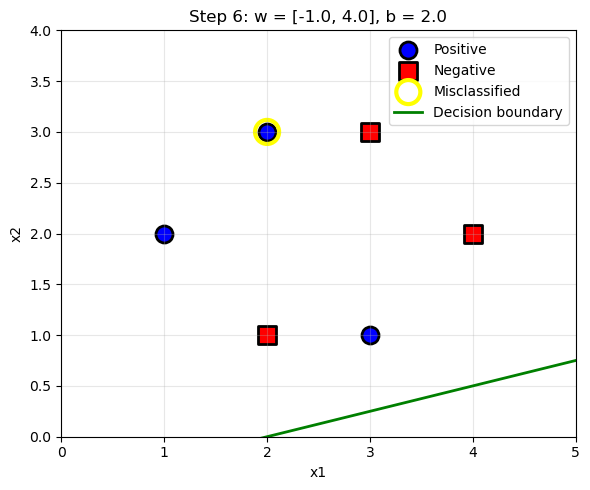

Step 7: Misclassified point 3: x=[4 2], y=-1
  Update: w = [-5.  2.], b = 1.0


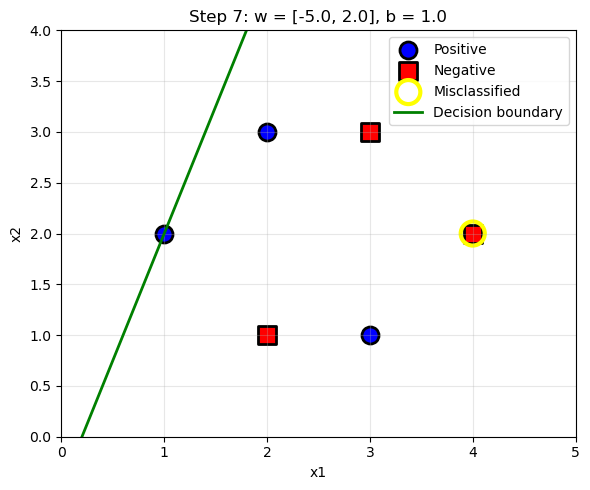

Step 8: Misclassified point 1: x=[2 3], y=1
  Update: w = [-3.  5.], b = 2.0


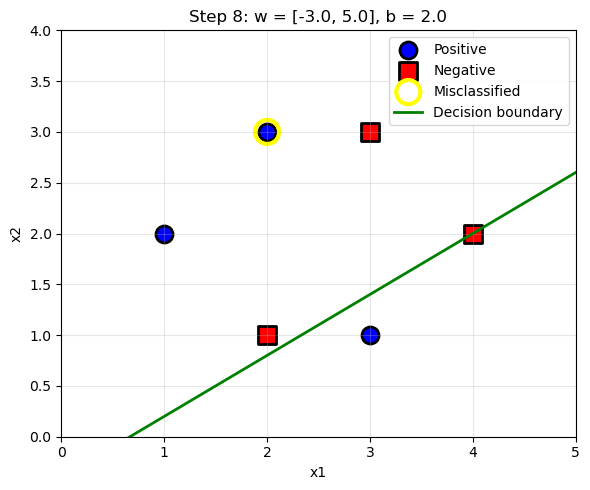

Step 9: Misclassified point 2: x=[3 1], y=1
  Update: w = [0. 6.], b = 3.0


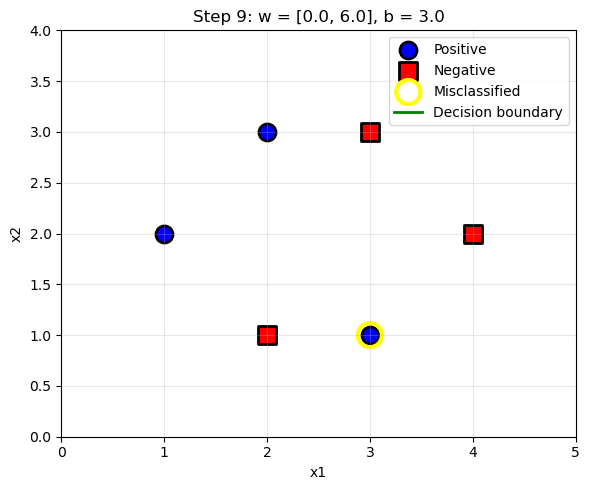

Step 10: Misclassified point 3: x=[4 2], y=-1
  Update: w = [-4.  4.], b = 2.0


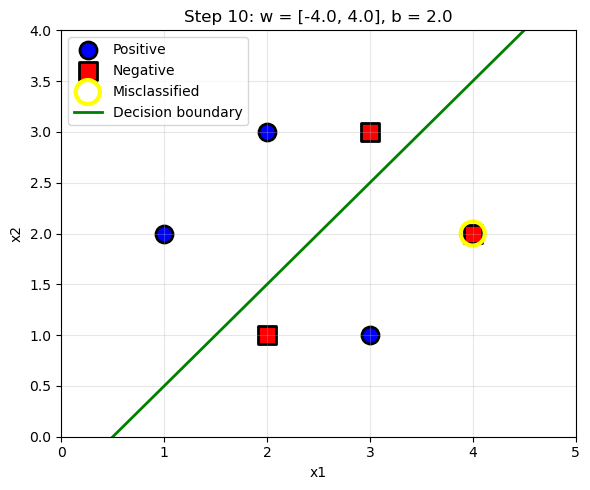

Step 11: Misclassified point 2: x=[3 1], y=1
  Update: w = [-1.  5.], b = 3.0


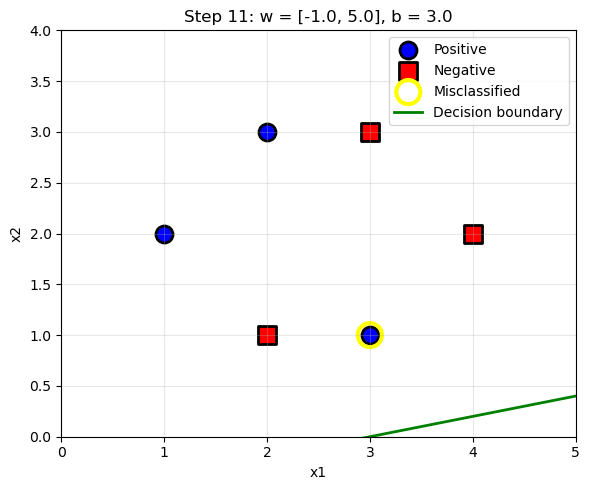

Step 12: Misclassified point 3: x=[4 2], y=-1
  Update: w = [-5.  3.], b = 2.0


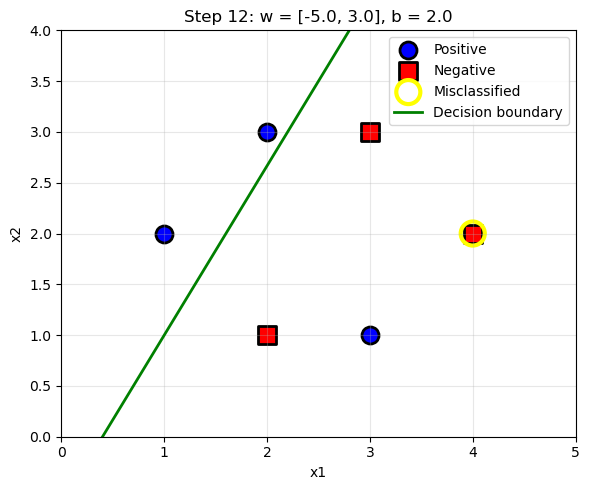

Step 13: Misclassified point 2: x=[3 1], y=1
  Update: w = [-2.  4.], b = 3.0


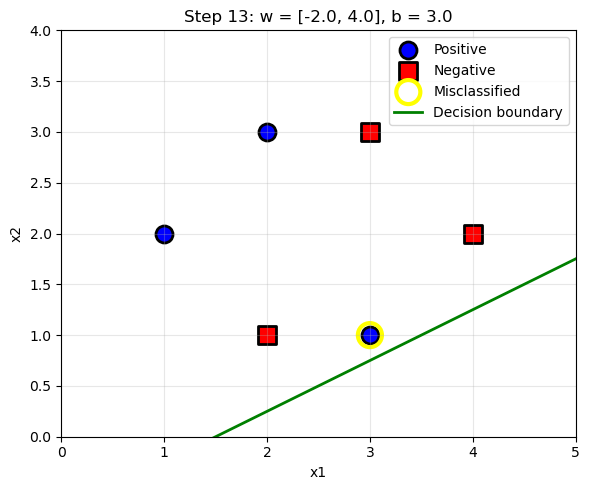

Step 14: Misclassified point 3: x=[4 2], y=-1
  Update: w = [-6.  2.], b = 2.0


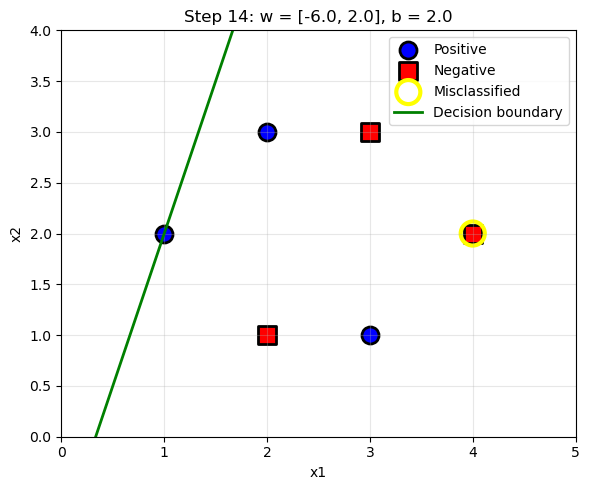

Step 15: Misclassified point 1: x=[2 3], y=1
  Update: w = [-4.  5.], b = 3.0


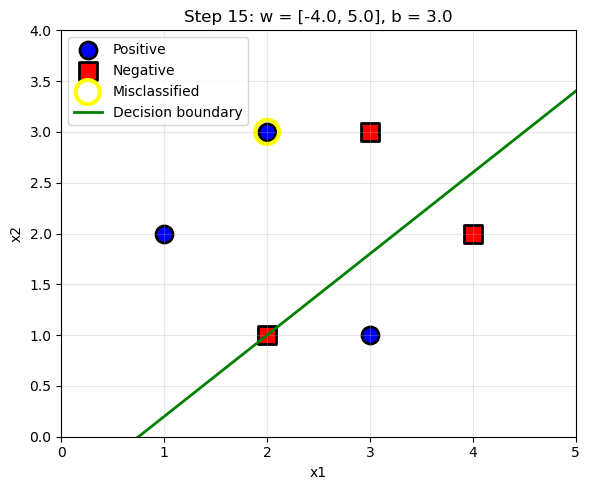

Step 16: Misclassified point 2: x=[3 1], y=1
  Update: w = [-1.  6.], b = 4.0


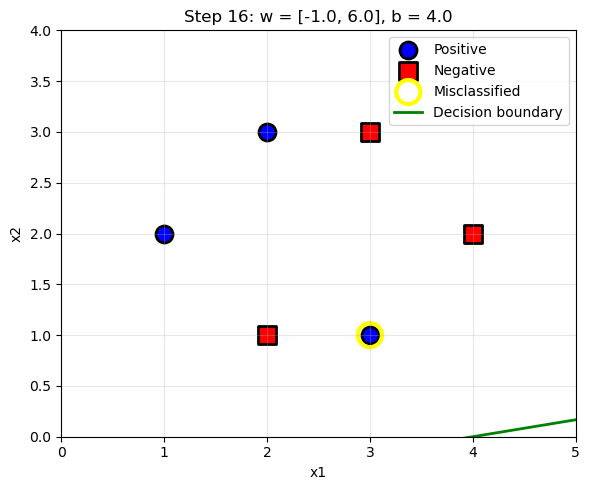

Step 17: Misclassified point 3: x=[4 2], y=-1
  Update: w = [-5.  4.], b = 3.0


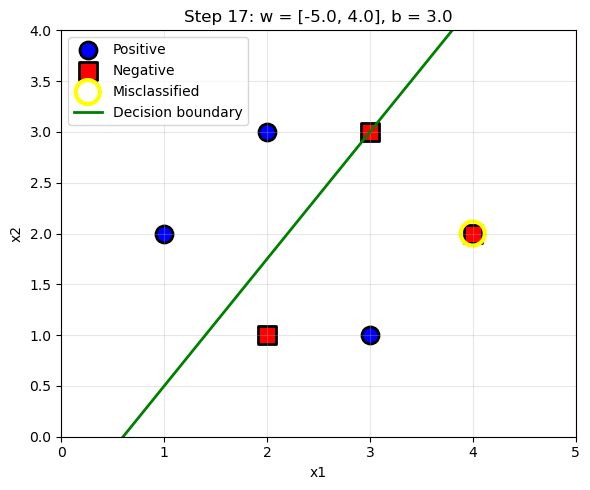

Step 18: Misclassified point 2: x=[3 1], y=1
  Update: w = [-2.  5.], b = 4.0


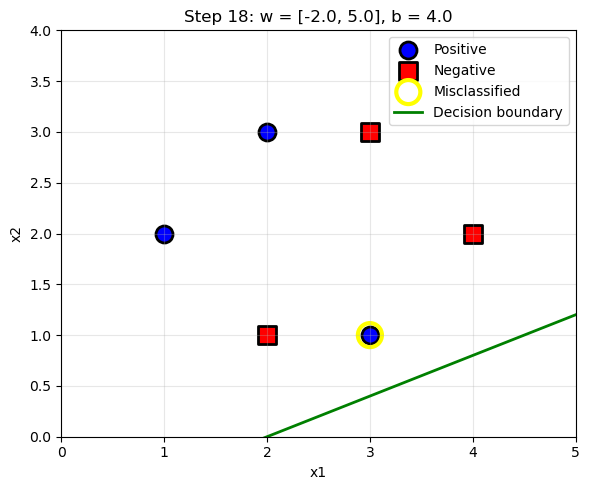

Step 19: Misclassified point 3: x=[4 2], y=-1
  Update: w = [-6.  3.], b = 3.0


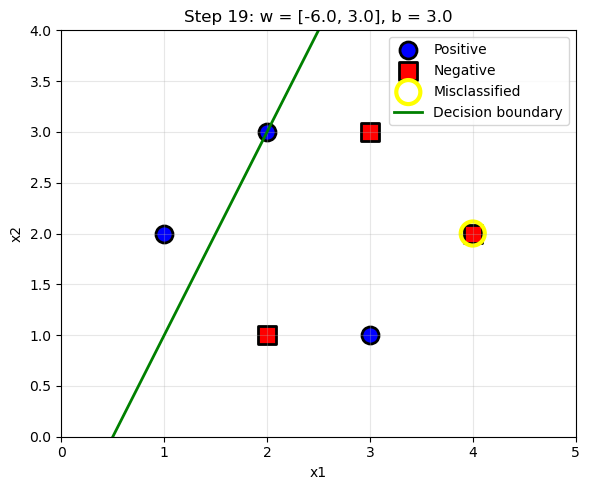

Step 20: Misclassified point 2: x=[3 1], y=1
  Update: w = [-3.  4.], b = 4.0


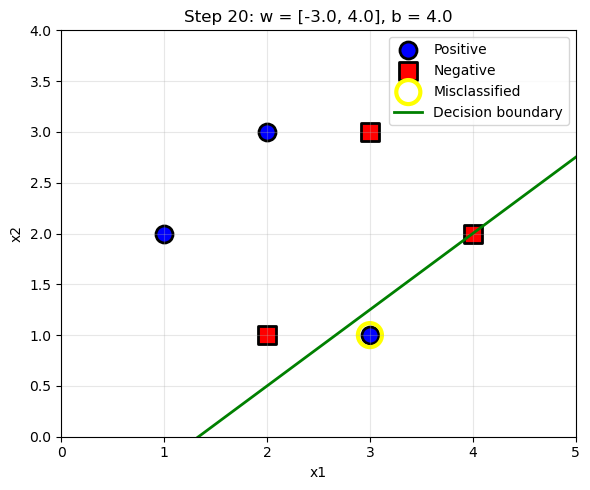


Final weight vector: w = [-3.  4.]
Final bias: b = 4.0

Final classification:
  x=[1 2], y= 1, sign(w·x+b)= 1 ✓
  x=[2 3], y= 1, sign(w·x+b)= 1 ✓
  x=[3 1], y= 1, sign(w·x+b)=-1 ✗
  x=[4 2], y=-1, sign(w·x+b)= 1 ✗
  x=[2 1], y=-1, sign(w·x+b)= 1 ✗
  x=[3 3], y=-1, sign(w·x+b)= 1 ✗


In [23]:
#Todo

# Problem 5: Visualizing Perceptron Convergence

import numpy as np
import matplotlib.pyplot as plt

# Small 2D dataset
X = np.array([[1, 2], [2, 3], [3, 1], [4, 2], [2, 1], [3, 3]])
y = np.array([1, 1, 1, -1, -1, -1])

print(f"Dataset: {len(X)} points")
print(f"Positive class: {X[y==1].tolist()}")
print(f"Negative class: {X[y==-1].tolist()}")
print()

# Initialize
w = np.array([0.0, 0.0])
b = 0.0  # bias
learning_rate = 1

# Function to plot decision boundary
def plot_step(w, b, step_num, misclassified_idx=None):
    plt.figure(figsize=(6, 5))
    
    # Plot data points
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', s=150, 
                marker='o', label='Positive', edgecolors='black', linewidth=2)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='red', s=150, 
                marker='s', label='Negative', edgecolors='black', linewidth=2)
    
    # Highlight misclassified point if any
    if misclassified_idx is not None:
        plt.scatter(X[misclassified_idx, 0], X[misclassified_idx, 1], 
                    s=300, facecolors='none', edgecolors='yellow', 
                    linewidth=3, label='Misclassified')
    
    # Plot decision boundary (if w is not zero)
    if np.linalg.norm(w) > 0.01:
        x_min, x_max = 0, 5
        x_vals = np.linspace(x_min, x_max, 100)
        # w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1*x1 + b) / w2
        if abs(w[1]) > 0.01:
            y_vals = -(w[0] * x_vals + b) / w[1]
            plt.plot(x_vals, y_vals, 'g-', linewidth=2, label='Decision boundary')
        else:
            # Vertical line if w2 is zero
            plt.axvline(x=-b/w[0], color='g', linewidth=2, label='Decision boundary')
    
    plt.xlim(0, 5)
    plt.ylim(0, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Step {step_num}: w = [{w[0]:.1f}, {w[1]:.1f}], b = {b:.1f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'perceptron_step_{step_num}.png', dpi=100, bbox_inches='tight')
    plt.show()

# Plot initial state
plot_step(w, b, 0)
print("Step 0: Initial weights w = [0.0, 0.0], b = 0.0")
print()

# Perceptron algorithm
step = 0
max_iterations = 20
converged = False

for iteration in range(max_iterations):
    if converged:
        break
    
    misclassified_found = False
    for i in range(len(X)):
        x_i = X[i]
        y_i = y[i]
        
        # Compute prediction
        activation = np.dot(w, x_i) + b
        prediction = 1 if activation >= 0 else -1
        
        # Check if misclassified
        if prediction != y_i:
            step += 1
            print(f"Step {step}: Misclassified point {i}: x={x_i}, y={y_i}")
            
            # Update weights
            w = w + learning_rate * y_i * x_i
            b = b + learning_rate * y_i
            
            print(f"  Update: w = {w}, b = {b:.1f}")
            
            # Plot after update
            plot_step(w, b, step, i)
            
            misclassified_found = True
            break  # Restart from first point
    
    if not misclassified_found:
        print(f"\nConverged after {step} updates!")
        converged = True

print()
print(f"Final weight vector: w = {w}")
print(f"Final bias: b = {b}")

# Verify all points are correctly classified
print("\nFinal classification:")
for i in range(len(X)):
    activation = np.dot(w, X[i]) + b
    prediction = 1 if activation >= 0 else -1
    correct = "✓" if prediction == y[i] else "✗"
    print(f"  x={X[i]}, y={y[i]:2d}, sign(w·x+b)={prediction:2d} {correct}")